In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

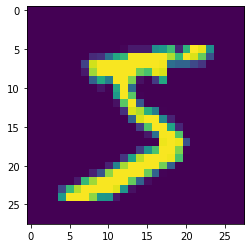

In [5]:
plt.imshow(x_train[0])

In [6]:
y_train[0]

5

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test  = x_test.reshape(10000, 28,28,1)

In [10]:
x_train = x_train.astype("float32") /255 
x_test = x_test.astype("float32") / 255


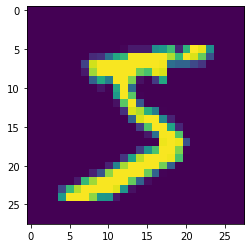

In [11]:
plt.imshow(x_train[0])

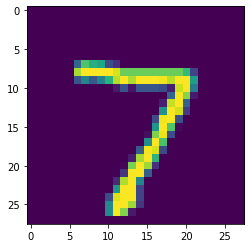

In [12]:
plt.imshow(x_test[0])

In [13]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
y_test.shape

(10000, 10)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [260]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, MaxPooling2D, BatchNormalization, Dropout

In [261]:
model = Sequential()

In [262]:
input_shape = (28, 28, 1)

In [263]:
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape,padding='same')) # parameter calculation filter * kernel size + bias ( bias is equal to the fitlers)
#parametes1 = 32 *3 * 3 + 32
#print(f"parameter layer 1 {parametes1}")
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(8, kernel_size=(1*1), activation="relu",padding='same'))
model.add(Conv2D(8, kernel_size=(3*3), activation="relu", padding='same'))
model.add(Conv2D(4, kernel_size=(3*3), activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(4, kernel_size=(1*1), activation="relu"))
model.add(Conv2D(4, kernel_size=(2*2), activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(8, kernel_size=(2*2), activation="relu"))
#model.add(Dropout(0.5))

#model.add(BatchNormalization())
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [264]:
model.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_312 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_161 (Bat (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_313 (Conv2D)          (None, 14, 14, 8)         264       
_________________________________________________________________
conv2d_314 (Conv2D)          (None, 14, 14, 8)         5192      
_________________________________________________________________
conv2d_315 (Conv2D)          (None, 14, 14, 4)         2596      
_________________________________________________________________
batch_normalization_162 (Bat (None, 14, 14, 4)       

In [265]:
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [266]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)

Epoch 1/30
1875/1875 [==============================] - 100s 53ms/step - loss: 0.6276 - accuracy: 0.8109 - val_loss: 0.1027 - val_accuracy: 0.9694
Epoch 2/30
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0897 - accuracy: 0.9734 - val_loss: 0.0637 - val_accuracy: 0.9814
Epoch 3/30
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0660 - accuracy: 0.9810 - val_loss: 0.0562 - val_accuracy: 0.9814
Epoch 4/30
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0564 - accuracy: 0.9823 - val_loss: 0.0487 - val_accuracy: 0.9859
Epoch 5/30
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0477 - accuracy: 0.9861 - val_loss: 0.0493 - val_accuracy: 0.9836
Epoch 6/30
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0520 - val_accuracy: 0.9841
Epoch 7/30
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0392 